# Variable Distribution

### Set Up

In [48]:
# Import necessary data libraries.
import pandas as pd
import os 
import csv
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

In [7]:
# Read in MasterData5.
master_data_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/MasterData5.csv'
master_data = pd.read_csv(master_data_url, sep = ',', engine = 'python')

In [16]:
# What are the columns in MasterData5? 
master_data.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'laps', 'familyStatus',
       'Completion Status', 'year', 'circuitId', 'country', 'alt',
       'isHistoric', 'trackType', 'nationality', 'total_lap_time',
       'average_lap_time', 'minimum_lap_time', 'PRCP', 'TAVG', 'TMAX', 'TMIN',
       'binned_circuits'],
      dtype='object')

In [72]:
# Only include the final, decided features we'll be using in our models. Do not include identifiable features.
distribute = master_data[['grid', 'familyStatus',
       'Completion Status', 'country', 'alt',
       'trackType', 'nationality',
       'average_lap_time', 'minimum_lap_time', 'PRCP', 'TAVG', 'TMAX', 'TMIN',
       'binned_circuits']]

### Plot the Distributions of Each Feature

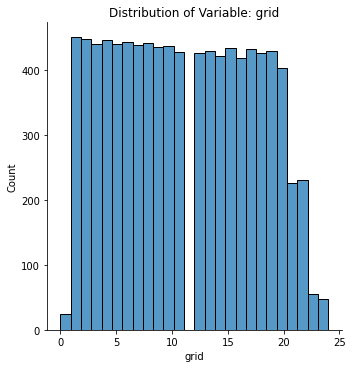

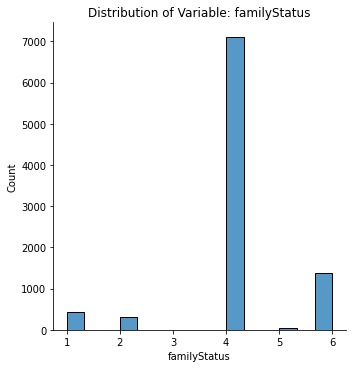

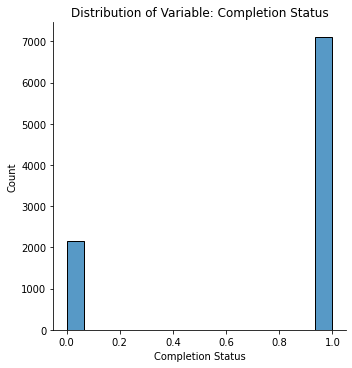

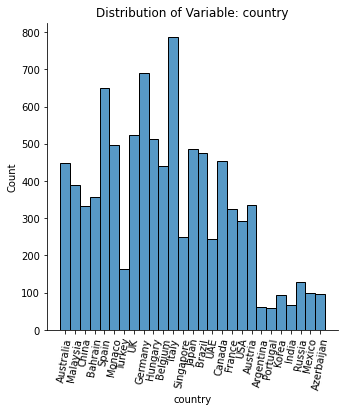

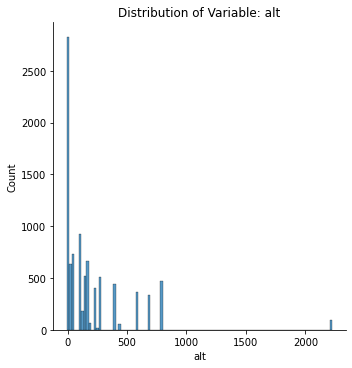

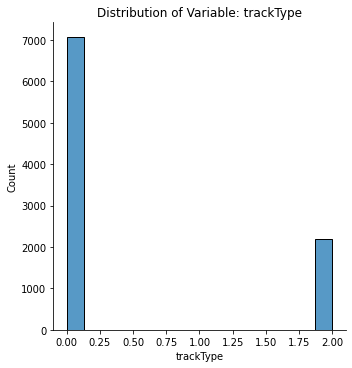

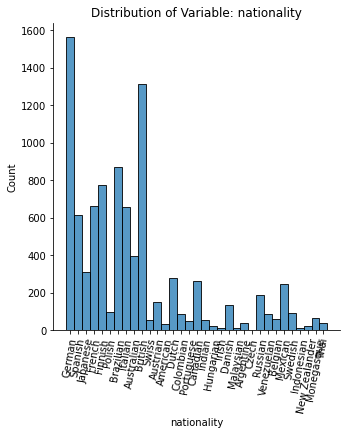

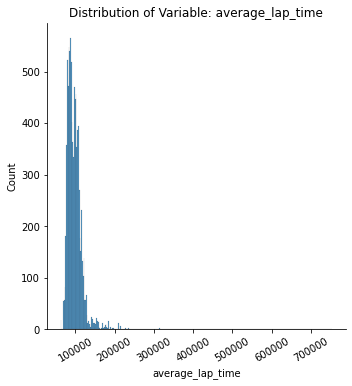

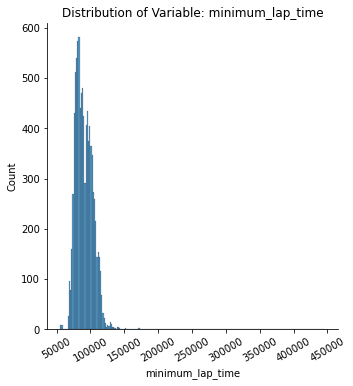

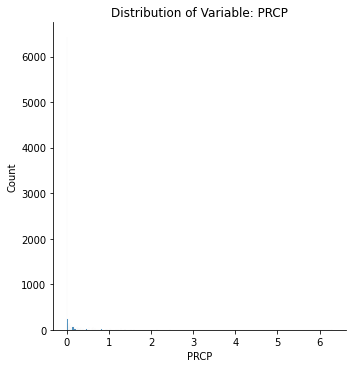

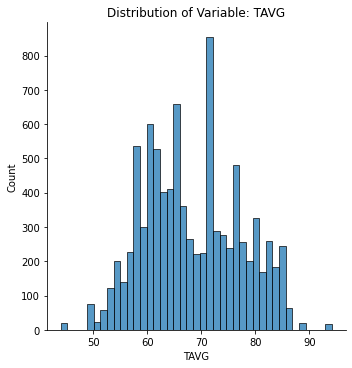

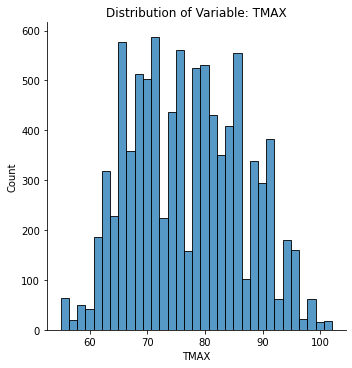

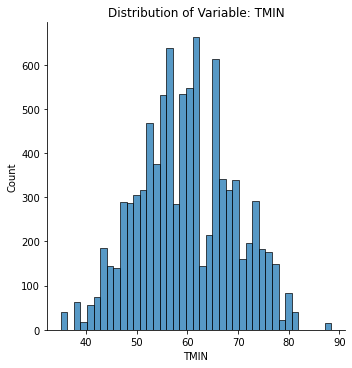

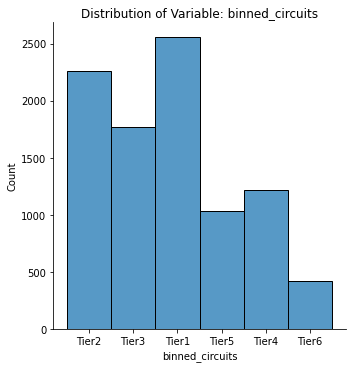

In [73]:
"""
Write a for loop through the columns.
Set title = t so we can individualize each title by its respective feature.
Use if-elif statements to rotate the axes of features that have overlapping labels.
"""
for i in distribute:
    t = "Distribution of Variable: " + i
    distribution = sns.displot(master_data, x = i).set(title = t)
    if i == "country":
        plt.xticks(rotation = 80)
    elif i == "nationality":
        plt.xticks(rotation = 80)
    elif i == "average_lap_time":
        plt.xticks(rotation = 30)
    elif i == "minimum_lap_time":
        plt.xticks(rotation = 30)

In [78]:
# There's a strange gap in the middle of grid's variable distribution. Is there a missing value?
master_data["grid"].value_counts()

1     451
2     448
4     446
6     443
8     442
3     441
5     440
7     439
10    437
9     435
15    434
17    433
19    430
13    430
11    428
18    427
12    427
14    422
16    418
20    403
22    230
21    226
23     55
24     48
0      25
Name: grid, dtype: int64

Judging by the value counts above, there is no missing value. This leaves the strange gap unexplained, but it's not a worry.

In [79]:
# Average lap time appears to be skewed, but how badly?
master_data["average_lap_time"].describe()

count      9258.000000
mean      97897.008632
std       21055.799600
min       62932.344828
25%       85066.436479
50%       94647.636739
75%      106184.579377
max      753493.000000
Name: average_lap_time, dtype: float64

Because 75% of the average lap times are 106184.579377 milliseconds or faster, and the maximum average lap time is 753493.000000 milliseconds, there is a serious skew.

In [81]:
# Minimum lap time appears to be skewed, but how badly?
master_data["minimum_lap_time"].describe()

count      9258.000000
mean      90865.612119
std       13720.583129
min       55404.000000
25%       80839.750000
50%       88988.500000
75%       99523.750000
max      446036.000000
Name: minimum_lap_time, dtype: float64

Because 75% of the minimum lap times are 99523.750000 milliseconds or faster, and the maximum average lap time is 446036.000000 milliseconds, there is a serious skew.

In [82]:
# Precipitation appears to be skewed, but how badly?
master_data["PRCP"].describe()

count    9258.000000
mean        0.112807
std         0.392287
min         0.000000
25%         0.000000
50%         0.000000
75%         0.040000
max         6.300000
Name: PRCP, dtype: float64

Because 75% of the precipitation counts are 0.040000 or lower, and the maximum precipitation count is 6.300000, there is a serious skew.

### Variable Distribution Conclusions

- grid: grid appears to be roughly equal for most values. There are a few 0s and values above 20.
- familyStatus: familyStatus has a clear class imbalance, with most cars having familyStatus 4.
- Completion Status: Completion Status also has a clear class imbalance, with most cars finishing the race.
- country: Italy has hosted the most races, Portugal the fewest. Other countries fall in between the two.
- alt: alt, like many of the other features, appears to be positively skewed.
- trackType: trackType also has a large class imbalance, with most tracks being race tracks and the others street tracks.
- nationality: nationality appears to be skewed for as much as a class feature can be. There are more German drivers than any other nationalities.
- average_lap_time: We know from both the distribution plot and the description above that this feature is severely positively skewed.
- minimum_lap_time: The description above suggests that this feature is severely positively skewed, but the distribution plot suggests that it may just be suffering from a particularly large outlier. Otherwise the feature appears almost normally distributed.
- PRCP: Like minium_lap_time, PRCP looks like it may just have an outlier or two and is not actually skewed, despite the description above.
- TAVG: TAVG appears to be roughly normally distributed.
- TMAX: TMAX appears to be unimodal, although it may be a stretch to call it normally distributed.
- TMIN: TMIN, like TAVG, appears to be roughly normally distributed.
- binned_circuits: There are more Tier1 binned_circuits than any other tier.